In [1]:
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
dataset= keras.datasets.fashion_mnist

In [3]:
train,test= dataset.load_data()
x_train, y_train=train
x_test, y_test=test

In [4]:
label_dict ={
0:'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'
}

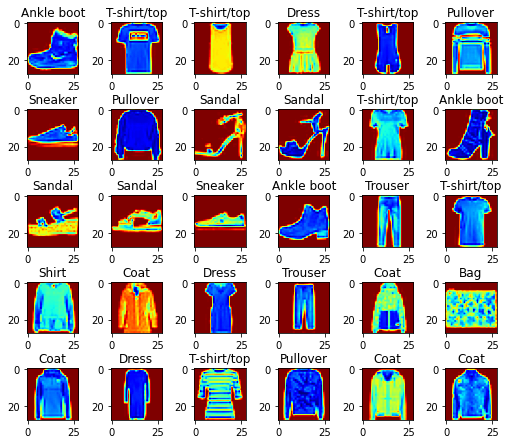

In [26]:
plt.figure(figsize=(7,7))
for i in range (30):
    plt.subplot(6,6,i+1)
    plt.title(label_dict[y_train[i]])
    plt.imshow(x_train[i].reshape(28,28), cmap='jet_r')
plt.tight_layout(pad=0.2)

In [7]:

# keep first 5000 as validation and rest as training
# each value in dataset is between (0-255), to scale these values divide xtrain andx_val by 255
x_val, xtrain= x_train[:5000]/255.0, x_train[5000:]/255.0

In [8]:
# answers are in discrete 0-9 no need to scale them
y_val, ytrain = y_train[:5000], y_train[5000:]

In [9]:
model= keras.models.Sequential()

In [10]:
# convert 3 -D to a  layer of 1 D so that it could be passed to neural network
# give the input shape of each image
model.add(keras.layers.Flatten(input_shape=[28,28]))


In [11]:
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))

In [12]:
# output in classes predicting the class of item between 0 to 9.
model.add(keras.layers.Dense(10, activation='sigmoid'))

In [13]:
model.summary()
# params: the values which can be corrections. 
# example: in first hidden layer: 784*300+300(bais weights)= 235500

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [36]:
x=model.fit(xtrain, ytrain, validation_data=(x_val, y_val), epochs=30)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1291 - val_loss: 0.4297
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1183 - val_loss: 0.4431
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1201 - val_loss: 0.4596
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1174 - val_loss: 0.4414
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1119 - val_loss: 0.5050
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1093 - val_loss: 0.4708
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1121 - val_loss: 0.4603
Epoch 8/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1120 - val_loss: 0.4944
Epoch 9/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1083 - val_loss: 0.4642
Epoch 10/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1

In [37]:
test= model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 159.4706


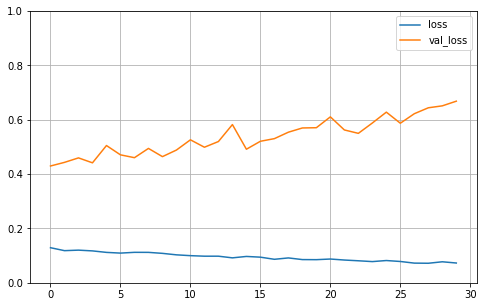

In [38]:
pd.DataFrame(x.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


# With the epochs the accuracy increased and loss kept on decreasing